# **Penguin Classification Analysis**

### **Load the dataset**

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("penguins_size.csv")

In [ ]:
data.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [ ]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### **Univariate Analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

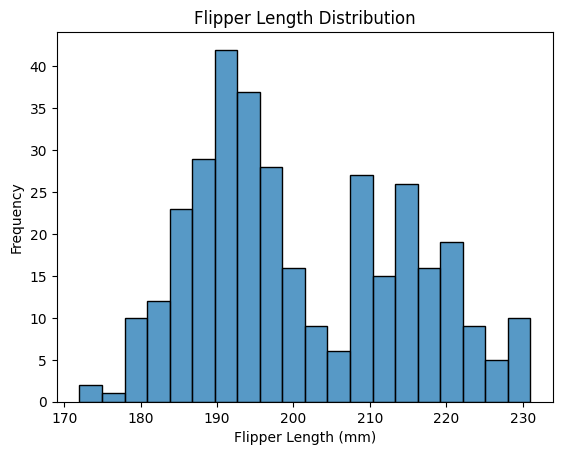

In [ ]:
sns.histplot(data['flipper_length_mm'], bins=20)
plt.title('Flipper Length Distribution')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.show()

### **Bi- Variate Analysis**

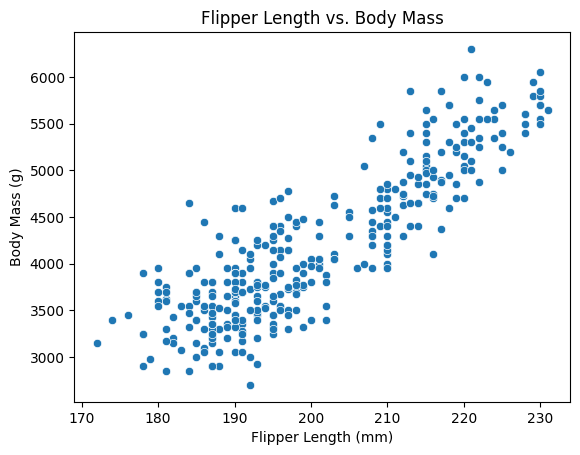

In [ ]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=data)
plt.title('Flipper Length vs. Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

### **Multi-Variate Analysis**

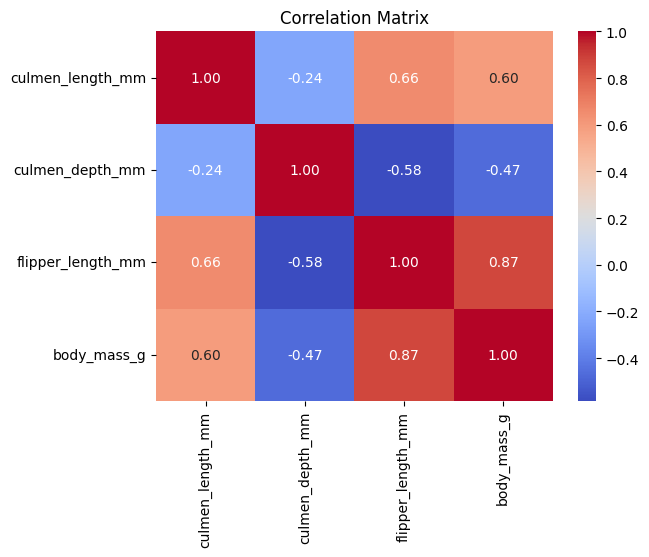

In [ ]:
data = data.select_dtypes(include=['number'])
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### **Descriptive statistics**

In [ ]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### **Check for Missing values and deal with them.**

In [ ]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

### **Find the outliers and replace them outliers**

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))
data = data[(z_scores < 3).all(axis=1)]
print(data)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[342 rows x 4 columns]


### **Checking Categorical columns and perform encoding.**

In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index([], dtype='object')


In [ ]:
encoded_data = pd.get_dummies(data, columns=categorical_columns)

In [ ]:
encoded_data.head(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0


In [ ]:
encoded_data.tail(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0
343,49.9,16.1,213.0,5400.0


### **Split the data into dependent and independent variables.**

In [ ]:
x = data.drop(columns=['body_mass_g'])
y = data['body_mass_g']

In [ ]:
print("Dependent Variable",y)

Dependent Variable 0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 342, dtype: float64


### **Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = x.select_dtypes(include=["number"])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### **Split the data into training and testing**


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
print("Training set shape (x_train, y_train):", x_train.shape, y_train.shape)
print("Testing set shape (x_test, y_test):", x_test.shape, y_test.shape)

Training set shape (x_train, y_train): (273, 3) (273,)
Testing set shape (x_test, y_test): (69, 3) (69,)


### **Build the Model**
**Random Forest Classifier**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred=model.predict(x_test)

### **Measure the performance using Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred,average='weighted')
recall = recall_score(y_test, pred,average='weighted')
f1 = f1_score(y_test,pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.057971014492753624
Precision: 0.06280193236714976
Recall: 0.057971014492753624
F1-score: 0.05555555555555555
